# Modelo de Nagel-Schreckenberg: Una Mirada Profunda

## Historia y Evolución

El modelo de Nagel-Schreckenberg, creado por Kai Nagel y Michael Schreckenberg a principios de la década de 1990, es una herramienta fundamental en la simulación de tráfico vehicular y en la comprensión de los fenómenos asociados al flujo de vehículos en carreteras. Este modelo surgió como respuesta a la necesidad de entender y abordar los problemas del tráfico en carreteras y autopistas.

El modelo ha evolucionado significativamente desde su creación. Inicialmente, se desarrolló como una simplificación de la dinámica del tráfico, pero con el tiempo se ha vuelto más sofisticado para incluir elementos como múltiples carriles, cambios de carril y efectos de congestión.

## Cómo Funciona

El modelo de Nagel-Schreckenberg se basa en una carretera unidimensional dividida en celdas discretas, donde cada celda puede estar vacía o ocupada por un vehículo. Los vehículos avanzan de una celda a otra en pasos discretos de tiempo, siguiendo reglas simples pero realistas:

  1. **Aceleración:** Si la velocidad de un vehículo es menor que su velocidad máxima permitida y no hay obstáculos delante, acelera en una unidad.

  2. **Desaceleración:** Si la distancia al vehículo de adelante es menor o igual a su velocidad actual, reduce su velocidad a la distancia disponible.

  3. **Frenado Aleatorio:** Con una probabilidad dada, un vehículo puede reducir su velocidad de manera aleatoria, simulando comportamientos humanos impredecibles.

  4. **Movimiento:** Los vehículos avanzan de acuerdo a sus velocidades actualizadas.

  5. **Entrada de Nuevos Vehículos:** En cada paso, se pueden agregar nuevos vehículos a la carretera, generalmente desde el extremo izquierdo.

## Interés y Aplicaciones

El modelo de Nagel-Schreckenberg es de gran interés debido a su capacidad para simular y comprender el tráfico vehicular en condiciones realistas. Algunas de sus aplicaciones y relevancias incluyen:

  1. **Diseño de Carreteras:** Permite evaluar la capacidad de carreteras y autopistas y diseñar soluciones para reducir la congestión.

  2. **Sistemas de Transporte Inteligente (ITS):** Ayuda en el desarrollo de sistemas de gestión de tráfico más eficientes y en la toma de decisiones en tiempo real.

  3. **Reducción de Congestión:** Proporciona información sobre la dinámica del tráfico, lo que puede llevar a estrategias de reducción de congestión.

  4. **Seguridad Vial:** Contribuye a comprender mejor el comportamiento de los conductores y cómo mejorar la seguridad en las carreteras.

  5. **Planificación Urbana:** Ayuda en la planificación urbana al simular el impacto del tráfico en el crecimiento de las ciudades.

En resumen, el modelo de Nagel-Schreckenberg es una herramienta valiosa en la investigación y el análisis de tráfico vehicular, y su evolución continua sigue siendo relevante para abordar los desafíos de movilidad en el mundo actual. Desde su creación, ha pasado de ser una simplificación a una herramienta sofisticada que puede ofrecer información valiosa para la planificación y gestión del tráfico.

In [1]:
import random
import numpy as npy
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [11]:
def create_custom_colormap(cmap_name = 'viridis'):
    """
    Crea un mapa de colores personalizado con blanco para -1 y una escala para otros valores.

    Parameters:
        cmap_name (str): Nombre del mapa de colores base a utilizar.

    Returns:
        LinearSegmentedColormap: Mapa de colores personalizado.
    """
    
    # Obtiene el mapa de colores base especificado por cmap_name
    cmap = plt.get_cmap(cmap_name)
    
    # Crea una lista de colores utilizando el mapa de colores base
    cmap_list = [cmap(i) for i in range(cmap.N)]
    
    # Establece el color blanco para el valor -1 en la lista de colores
    cmap_list[0] = (1, 1, 1, 1)  # Blanco: (R, G, B, A)
    
    # Crea un mapa de colores lineal segmentado personalizado a partir de la lista de colores
    custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', cmap_list, cmap.N)
    
    return custom_cmap

def initialize_road(length, density, max_speed):
    """
    Inicializa la carretera con vehículos.

    Parameters:
        length (int): Longitud de la carretera.
        density (float): Densidad de vehículos en la carretera.
        max_speed (int): Velocidad máxima de los vehículos.

    Returns:
        list: Lista que representa el estado inicial de la carretera.
    """
    
    road = [-1 if random.random() > density else random.randint(0, max_speed) for _ in range(length)]
    
    return road

def update(road, max_speed, p_slow):
    """
    Actualiza el estado de la carretera en un paso de simulación.

    Parameters:
        road (list): Lista que representa el estado actual de la carretera.
        max_speed (int): Velocidad máxima de los vehículos.
        p_slow (float): Probabilidad de reducir la velocidad.

    Returns:
        list: Lista que representa el estado actualizado de la carretera.
    """
    
    new_road = [-1] * len(road)
    
    for i in range(len(road)):
        if road[i] == -1:
            continue
        else:
            distance = 1
            while road[(i + distance) % len(road)] == -1:
                distance += 1
            if road[i] < max_speed and distance > road[i]:
                road[i] += 1
            if road[i] > 0 and random.random() < p_slow:
                road[i] -= 1
            new_position = min(i + road[i], len(road) - 1)            
            new_road[new_position] = road[i]
            
    return new_road

def simulate_traffic(length, density, max_speed, p_slow, num_steps):
    """
    Simula el tráfico vehicular y muestra un heatmap de la carretera en cada paso de tiempo.

    Parameters:
        length (int): Longitud de la carretera.
        density (float): Densidad de vehículos en la carretera.
        max_speed (int): Velocidad máxima de los vehículos.
        p_slow (float): Probabilidad de reducir la velocidad.
        num_steps (int): Número de pasos de simulación.
    """
    
    road = initialize_road(length, density, max_speed)
    heatmap = []
    
    for step in range(num_steps):
        heatmap.append(road.copy())
        road = update(road, max_speed, p_slow)
    
    heatmap = npy.array(heatmap)
    
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (length/(5*3), num_steps/3))
    
    heatmap = ax.imshow(heatmap, 
                        cmap = create_custom_colormap(cmap_name = 'brg'), 
                        origin = 'upper', 
                        aspect = 'auto',
                        vmin = -0.5)
    ax.set_xlabel("Posición")
    ax.set_ylabel("Tiempo")
    ax.set_yticks(range(num_steps + 1))
    ax.set_title("Simulación de Tráfico")
    fig.colorbar(heatmap, 
                 label = "Velocidad del vehículo", 
                 ax = ax)
    fig.tight_layout()
    fig.savefig(f'results/nagel-schreckenberg-model-{length}-{density}-{max_speed}-{p_slow}-{num_steps}.png')

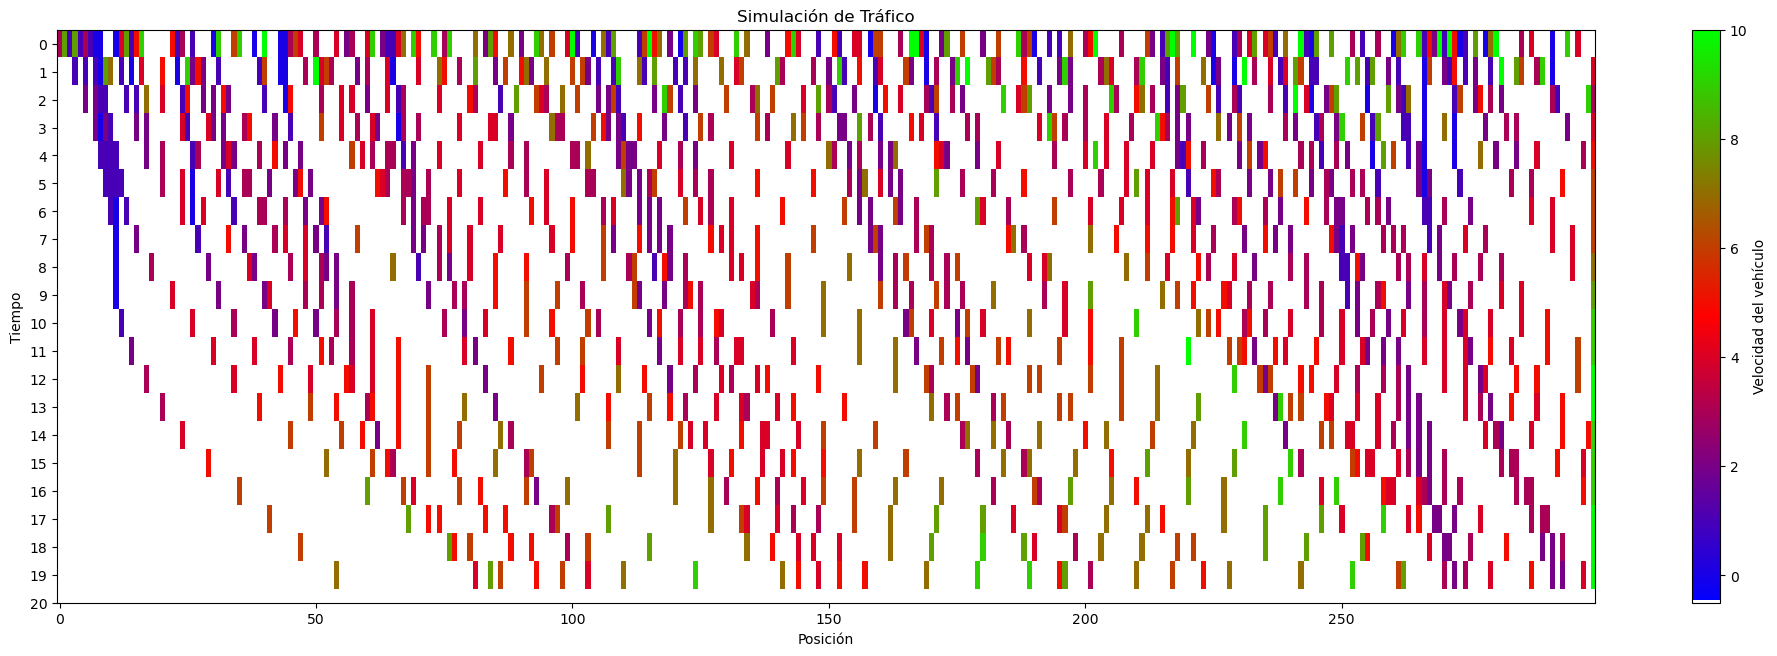

In [12]:
if __name__ == "__main__":
    
    ROAD_LENGTH = 300  # Longitud de la carretera
    VEHICLE_DENSITY = 0.5  # Densidad de vehículos en la carretera
    MAX_VEHICLE_SPEED = 10  # Velocidad máxima de los vehículos
    SLOWDOWN_PROBABILITY = 0.3  # Probabilidad de reducir la velocidad
    SIMULATION_STEPS = 20  # Número de pasos de simulación
    
    simulate_traffic(ROAD_LENGTH, VEHICLE_DENSITY, MAX_VEHICLE_SPEED, SLOWDOWN_PROBABILITY, SIMULATION_STEPS)


## Cómo Funciona (con Asociación al Código)

  1. **Aceleración (Asociada al código en `update`):** En el código, la aceleración se refleja en la sección donde se verifica si la velocidad actual de un vehículo es menor que su velocidad máxima permitida (`max_speed`) y no hay obstáculos delante. La línea correspondiente sería:

   ```python
   if road[i] < max_speed and distance > road[i]:
       road[i] += 1
   ```

   Esta parte del código permite que un vehículo acelere en una unidad si cumple las condiciones mencionadas.

  2. **Desaceleración (Asociada al código en `update`):** La desaceleración se manifiesta en el código cuando se comprueba si la distancia al vehículo de adelante es menor o igual a su velocidad actual. La línea correspondiente sería:

   ```python
   if road[i] > 0 and random.random() < p_slow:
       road[i] -= 1
   ```

   Aquí, un vehículo reduce su velocidad a la distancia disponible si cumple las condiciones.

  3. **Frenado Aleatorio (Asociado al código en `update`):** El frenado aleatorio se implementa en el código mediante la probabilidad `p_slow` y una elección aleatoria. La línea relevante sería:

   ```python
   if road[i] > 0 and random.random() < p_slow:
       road[i] -= 1
   ```

   Cuando se cumple la condición, un vehículo puede reducir su velocidad de manera aleatoria.

  4. **Movimiento (Asociado al código en `update`):** El movimiento de los vehículos se produce en el código después de que se han considerado la aceleración, desaceleración y frenado aleatorio. La línea correspondiente sería:

   ```python
   new_position = min(i + road[i], len(road) - 1)
   new_road[new_position] = road[i]
   ```

   Aquí, un vehículo avanza a una nueva posición de acuerdo con su velocidad actualizada.

  5. **Entrada de Nuevos Vehículos (Asociada al código en `initialize_road`):** La entrada de nuevos vehículos se encuentra principalmente en la función `initialize_road`, donde se crea la carretera inicialmente y se agregan vehículos en la posición más a la izquierda en cada paso. El código relevante sería:

   ```python
   for _ in range(vehicles_per_step):
       if random.random() <= density:
           if road[0] == -1:
               road[0] = random.randint(0, max_speed)
   ```

   Esto permite que nuevos vehículos entren en la carretera por la izquierda en cada paso.

Esta descripción muestra cómo cada paso del modelo se relaciona con partes específicas del código en Python.

In [5]:
import pygame
import random
import math

# Configuración de la simulación
WIDTH, HEIGHT = 800, 600
N_ESTORNINOS = 100
SPEED = 2
COHESION_RADIUS = 50
ALIGNMENT_RADIUS = 50
SEPARATION_RADIUS = 20
RANDOM_MOVEMENT = 500.0  # Factor de movimiento aleatorio
WINDOW_TITLE = "Simulación de Bandada de Estorninos"

# Colores
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Inicialización de pygame
pygame.init()
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption(WINDOW_TITLE)

# Función para calcular la distancia entre dos puntos
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Inicialización de la posición y velocidad de los estorninos
estorninos = [(random.randint(0, WIDTH), random.randint(0, HEIGHT), random.uniform(-SPEED, SPEED), random.uniform(-SPEED, SPEED)) for _ in range(N_ESTORNINOS)]

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Calcula la nueva posición de los estorninos
    new_estorninos = []
    for x, y, vx, vy in estorninos:
        # Calcula la velocidad promedio de los vecinos cercanos
        avg_vx, avg_vy = 0, 0
        count = 0
        for nx, ny, _, _ in estorninos:
            if x != nx and y != ny and distance((x, y), (nx, ny)) < ALIGNMENT_RADIUS:
                avg_vx += vx
                avg_vy += vy
                count += 1
        if count > 0:
            avg_vx /= count
            avg_vy /= count

        # Calcula la dirección hacia el centro de la bandada
        center_x, center_y = sum([nx for nx, _, _, _ in estorninos]) / N_ESTORNINOS, sum([ny for _, ny, _, _ in estorninos]) / N_ESTORNINOS
        center_vx, center_vy = center_x - x, center_y - y

        # Calcula la dirección para evitar colisiones
        avoid_vx, avoid_vy = 0, 0
        for nx, ny, _, _ in estorninos:
            if x != nx and y != ny and distance((x, y), (nx, ny)) < SEPARATION_RADIUS:
                avoid_vx += x - nx
                avoid_vy += y - ny

        # Agrega movimiento aleatorio
        random_move_x = (random.random() - 0.5) * RANDOM_MOVEMENT
        random_move_y = (random.random() - 0.5) * RANDOM_MOVEMENT

        # Actualiza la velocidad
        vx += avg_vx + center_vx + avoid_vx + random_move_x
        vy += avg_vy + center_vy + avoid_vy + random_move_y

        # Limita la velocidad máxima
        speed = math.sqrt(vx ** 2 + vy ** 2)
        if speed > SPEED:
            vx = (vx / speed) * SPEED
            vy = (vy / speed) * SPEED

        # Actualiza la posición
        new_x = x + vx
        new_y = y + vy

        # Asegura que los estorninos no salgan de la pantalla
        new_x = max(0, min(WIDTH, new_x))
        new_y = max(0, min(HEIGHT, new_y))

        new_estorninos.append((new_x, new_y, vx, vy))

    estorninos = new_estorninos

    # Dibuja la simulación
    screen.fill(BLACK)
    for x, y, _, _ in estorninos:
        pygame.draw.circle(screen, WHITE, (int(x), int(y)), 2)
    pygame.display.flip()

pygame.quit()
